In [53]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
dataset=pd.read_csv('data.csv')

In [55]:
dataset.drop(['id'], axis='columns', inplace=True)
dataset.drop(['perimeter_mean', 'perimeter_se', 'perimeter_worst'], axis='columns', inplace=True)
dataset.drop(['Radius_mean', 'radius_se', 'radius_worst'], axis='columns', inplace=True)
dataset.drop(['symmetry_se','texture_se','smoothness_se','fractal_dimension_se'], axis='columns', inplace=True)
dataset.drop('fractal_dimension_mean',axis='columns', inplace=True)
dataset.drop('Texture_mean',axis='columns', inplace=True)
dataset.drop(['area_mean','compactness_worst'],axis='columns', inplace=True)

In [56]:
dataset['diagnosis'] = dataset['diagnosis'].map({'M': 1, 'B': 0})

In [57]:
scaler = MinMaxScaler()
X = dataset.drop('diagnosis', axis=1)
X = scaler.fit_transform(X)
y = dataset['diagnosis']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [59]:
model = DecisionTreeClassifier()

In [60]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
train_score = model.score(X_train, y_train)*100
print("Training score:", train_score)

test_score = model.score(X_test, y_test)*100
print("Testing score:", test_score)

Training score: 100.0
Testing score: 93.00699300699301


Accuracy: 93.00699300699301


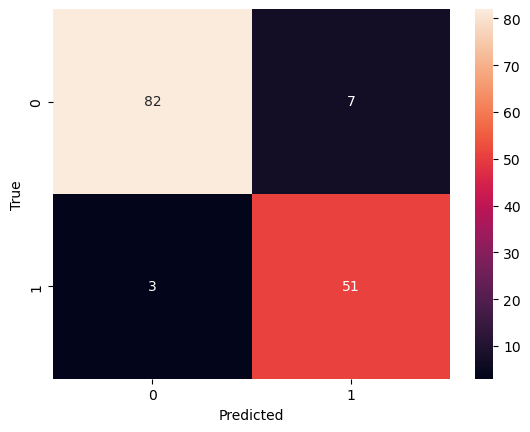

In [62]:
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()